In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

---

## 1. 붓꽃 데이터가 무엇인지 알아보기
- 붗꽃 데이터는 해당 코드로 얻을 수 있음 (`from sklearn.datasets import load_iris`)
- 사용방법 및 데이터 포맷을 숙지할 것 

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()

# Iris 데이터세트에서 feature만으로 된 데이터를 numpy로 가지고 있다.
iris_data = iris.data

#iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있다.
iris_label = iris.target
print('iris target 값 : ', iris_label)
print('iris target 명 : ', iris.target_names) 

iris target 값 :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명 :  ['setosa' 'versicolor' 'virginica']


- 사용 방법 
    1. `from sklearn.datasets import load_iris` 를 사용하여 붓꽃 데이터를 불러온다.
    2. 붓꽃 데이터를 로딩할때 `iris_iris()` 를 사용하여 로딩한다.
- 데이터 포맷
    - 데이터 세트의 피처와 레이블(결정값)은 numpy로 구성되어 있다.

In [5]:
#DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


- 데이터 프레임으로 변환하여 자세히 확인할 수 있다.
    - **feature**에는 sepal(꽃받침) length, sepal width, petal(꽃잎) length, petal width가 있다.
    - **target**은 0, 1, 2로 구성되어 있으며, 0은 setosa, 1은 versicolor, 2는 virginica 품종을 의미한다.
    - `info()` 메소드 : 데이터 세트의 전반적인 정보를 확인할 수 있다.
        - 데이터 세트의 피처, 레이블 값의 타입, Null 값의 존재 여부를 확인할 수 있다.
        - **iris 데이터 세트**는 Null 값이 없으며, float형의 숫자형 값과 label은 int형 값으로 구성되어 있다.

## 2. 각각 종에 대해 꽃받침의 길이, 꽃받침의 폭, 꽃잎의 길이, 꽃잎의 폭의 평균과 분산을 구하고 어떻게 다른지 설명하기


- label의 0, 1, 2 는 ['setosa' 'versicolor' 'virginica'] 해당 종을 가리킨다.

In [7]:
iris_df_stats = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df_stats['label'] = iris.target

# 알아보기 쉽게 label의 숫자값을 종 이름으로 변경
iris_df_stats['label'] = iris_df_stats['label'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
iris_df_stats.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 산점도 그래프로 특성 확인

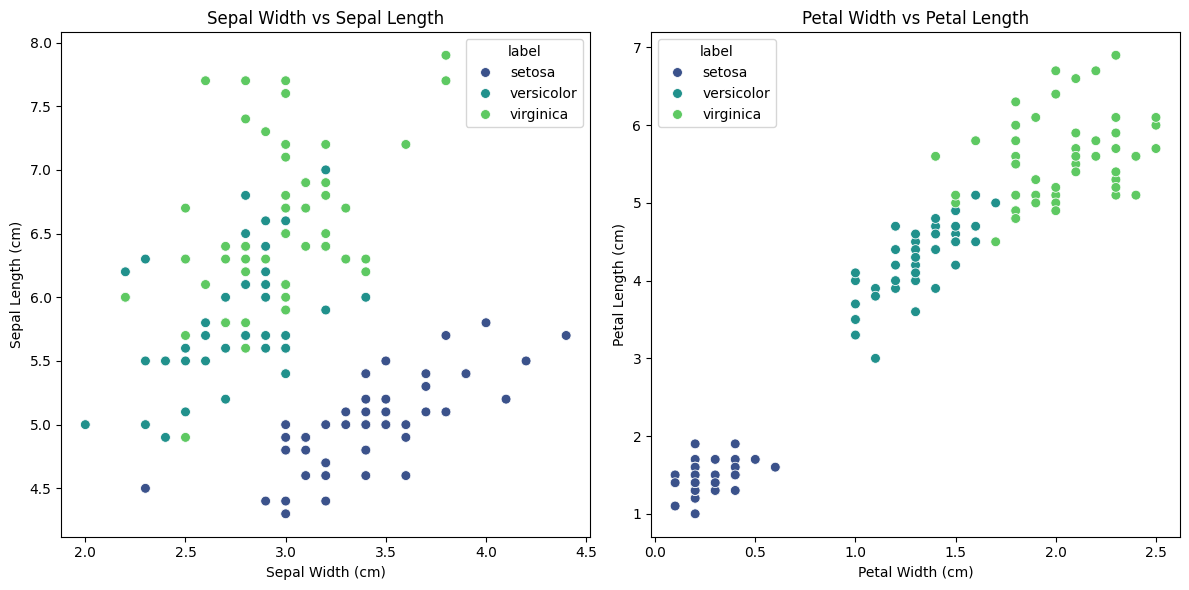

In [8]:
# 꽃받침의 너비와 높이에 대한 산점도
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1행 2열의 두 번째 위치
sns.scatterplot(x='sepal width (cm)', y='sepal length (cm)', hue='label', data=iris_df_stats, palette='viridis', s=50)
plt.title('Sepal Width vs Sepal Length')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')

# 꽃잎의 너비와 높이에 대한 산점도
plt.subplot(1, 2, 2)  # 1행 2열의 첫 번째 위치
sns.scatterplot(x='petal width (cm)', y='petal length (cm)', hue='label', data=iris_df_stats, palette='viridis', s=50)
plt.title('Petal Width vs Petal Length')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')

plt.tight_layout()  # 레이아웃 조정
plt.show()

In [9]:
# 종별 평균과 분산 계산
mean = iris_df_stats.groupby('label').mean()
variance = iris_df_stats.groupby('label').var() # 표본분산

**평균과 분산 계산 결과를 보기 쉽게 df형식으로 출력**

In [10]:
mean

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
label,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [11]:
variance

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
label,,,,
setosa,0.124249,0.143690,0.030159,0.011106
versicolor,0.266433,0.098469,0.220816,0.039106
virginica,0.404343,0.104004,0.304588,0.075433


- 분산의 크기로 알 수 있는 정보
    - 작은 분산 : 해당 특성의 측정값이 평균 주위에 밀접하게 모여있음을 나타냄
    - 큰 분산 : 해당 특성의 측정값이 평균으로부터 넓게 퍼져있음을 나타냄

### 종별 분석
- setosa 종
    1. 꽃받침의 길이는 가장 작고, 꽃받침의 너비는 가장 크다.
    2. 꽃잎의 길이와 꽃잎의 너비는 가장 작다.
    3. 꽃받침의 길이의 분산은 가장 작고 꽃받침의 너비의 분산은 가장 크다. 즉, 꽃받침 길이는 비교적 균일한 편이고 꽃받침 너비는 다양한 편이다.
    4. 꽃잎의 길이와 너비의 분산은 가장 작다. 즉, 꽃잎의 길이와 너비는 비교적 균일한 편이다.

- versicolor 종 
    1. 꽃받침의 길이는 중간이고 꽃받침의 너비는 가장 작다.
    2. 꽃잎의 길이와 너비는 중간이다.
    3. 꽃받침의 길이의 분산은 중간이고 꽃받침의 너비의 분산은 가장 작다. 즉, 꽃받침 길이는 비교적 다양한 편이고 꽃받침 너비는 비교적 균일한 편이다.
    4. 꽃잎의 길이와 너비의 분산은 중간이다. 즉, 꽃잎의 길이와 너비는 비교적 다양한 편이다.

- virginica 종
    1. 꽃받침의 길이는 가장 크고 꽃받침의 너비는 중간이다.
    2. 꽃잎의 길이와 너비는 가장 크다.
    3. 꽃받침의 길이의 분산은 가장 크고 꽃받침의 너비의 분산은 중간이다. 즉, 꽃받침 길이는 다양한 편이고 꽃받침 너비는 비교적 다양한 편이다.
    4. 꽃잎의 길이의 너비와 분산은 가장 크다. 즉, 꽃잎의 길이와 너비는 다양한 편이다.



#### 추가적으로 각 특성을 그래프로 시각화하기

In [19]:
# 분류값 별로 데이터프레임을 나눕니다
setosa_df = iris_df_stats[iris_df_stats['label'] == "setosa"]
versicolor_df = iris_df_stats[iris_df_stats['label'] == "versicolor"]
virginica_df = iris_df_stats[iris_df_stats['label'] == "virginica"]

In [23]:
#setosa_df.head()
#versicolor_df.head()
virginica_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


### 각 꽃종의 각 특성의 분포를 시각화 / chatgpt 사용
- prompt : 
    ```
    해당 데이터프레임을 꽃 종별로 나누었다.
    이 데이터프레임을 주어진 사진 시각화 코드처럼 정규분포 그래프인 것을 확인하기 위해 4X3 그래프로 한번에 시각화 할 수 있는 코드를 알려줘
    ```
- 답변 결과 : 각 아이리스 종에 대한 데이터 프레임을 분리하여 꽃받침길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비의 히스토그램과 KDE를 함께 표시하는 4X3 그래프를 생성하는 코드를 아래와 같이 설명
#### 코드 분석(알게된 점)
1. 커널 밀도 추정 : 확률 밀도 함수를 추정하기 위한 비모수적 방법, 데이터 포인트를 부드럽고 연속적인 밀도 곡선으로 나타내어 데이터의 분포를 시각화하고 이해하는 데 도움을 준다.
2. 
    ```python
    for i, feature in enumerate(features):
        for j, (species, df) in enumerate(dfs.items()):
            ax = axes[i, j]
            sns.histplot(df[feature], kde=True, ax=ax)
        ax.set_title(f'{species} {feature}')
        ax.set_xlabel('')
        ax.set_ylabel('')
    ```
- 내부 반복문 : `enumerate(dfs.items())` 를 사용하여 dfs 딕셔너리의 키-값 쌍을 반복, j는 종의 이름, df는 종의 데이터 프레임을 나타낸다.
- `ax = axes[i, j]` : 4X3 그래프에서 각 특성의 위치를 나타낸다.
- `sns.histplot(df[feature], kde=True, ax=ax)` : 히스토그램과 커널 밀도 추정을 함께 표시한다.

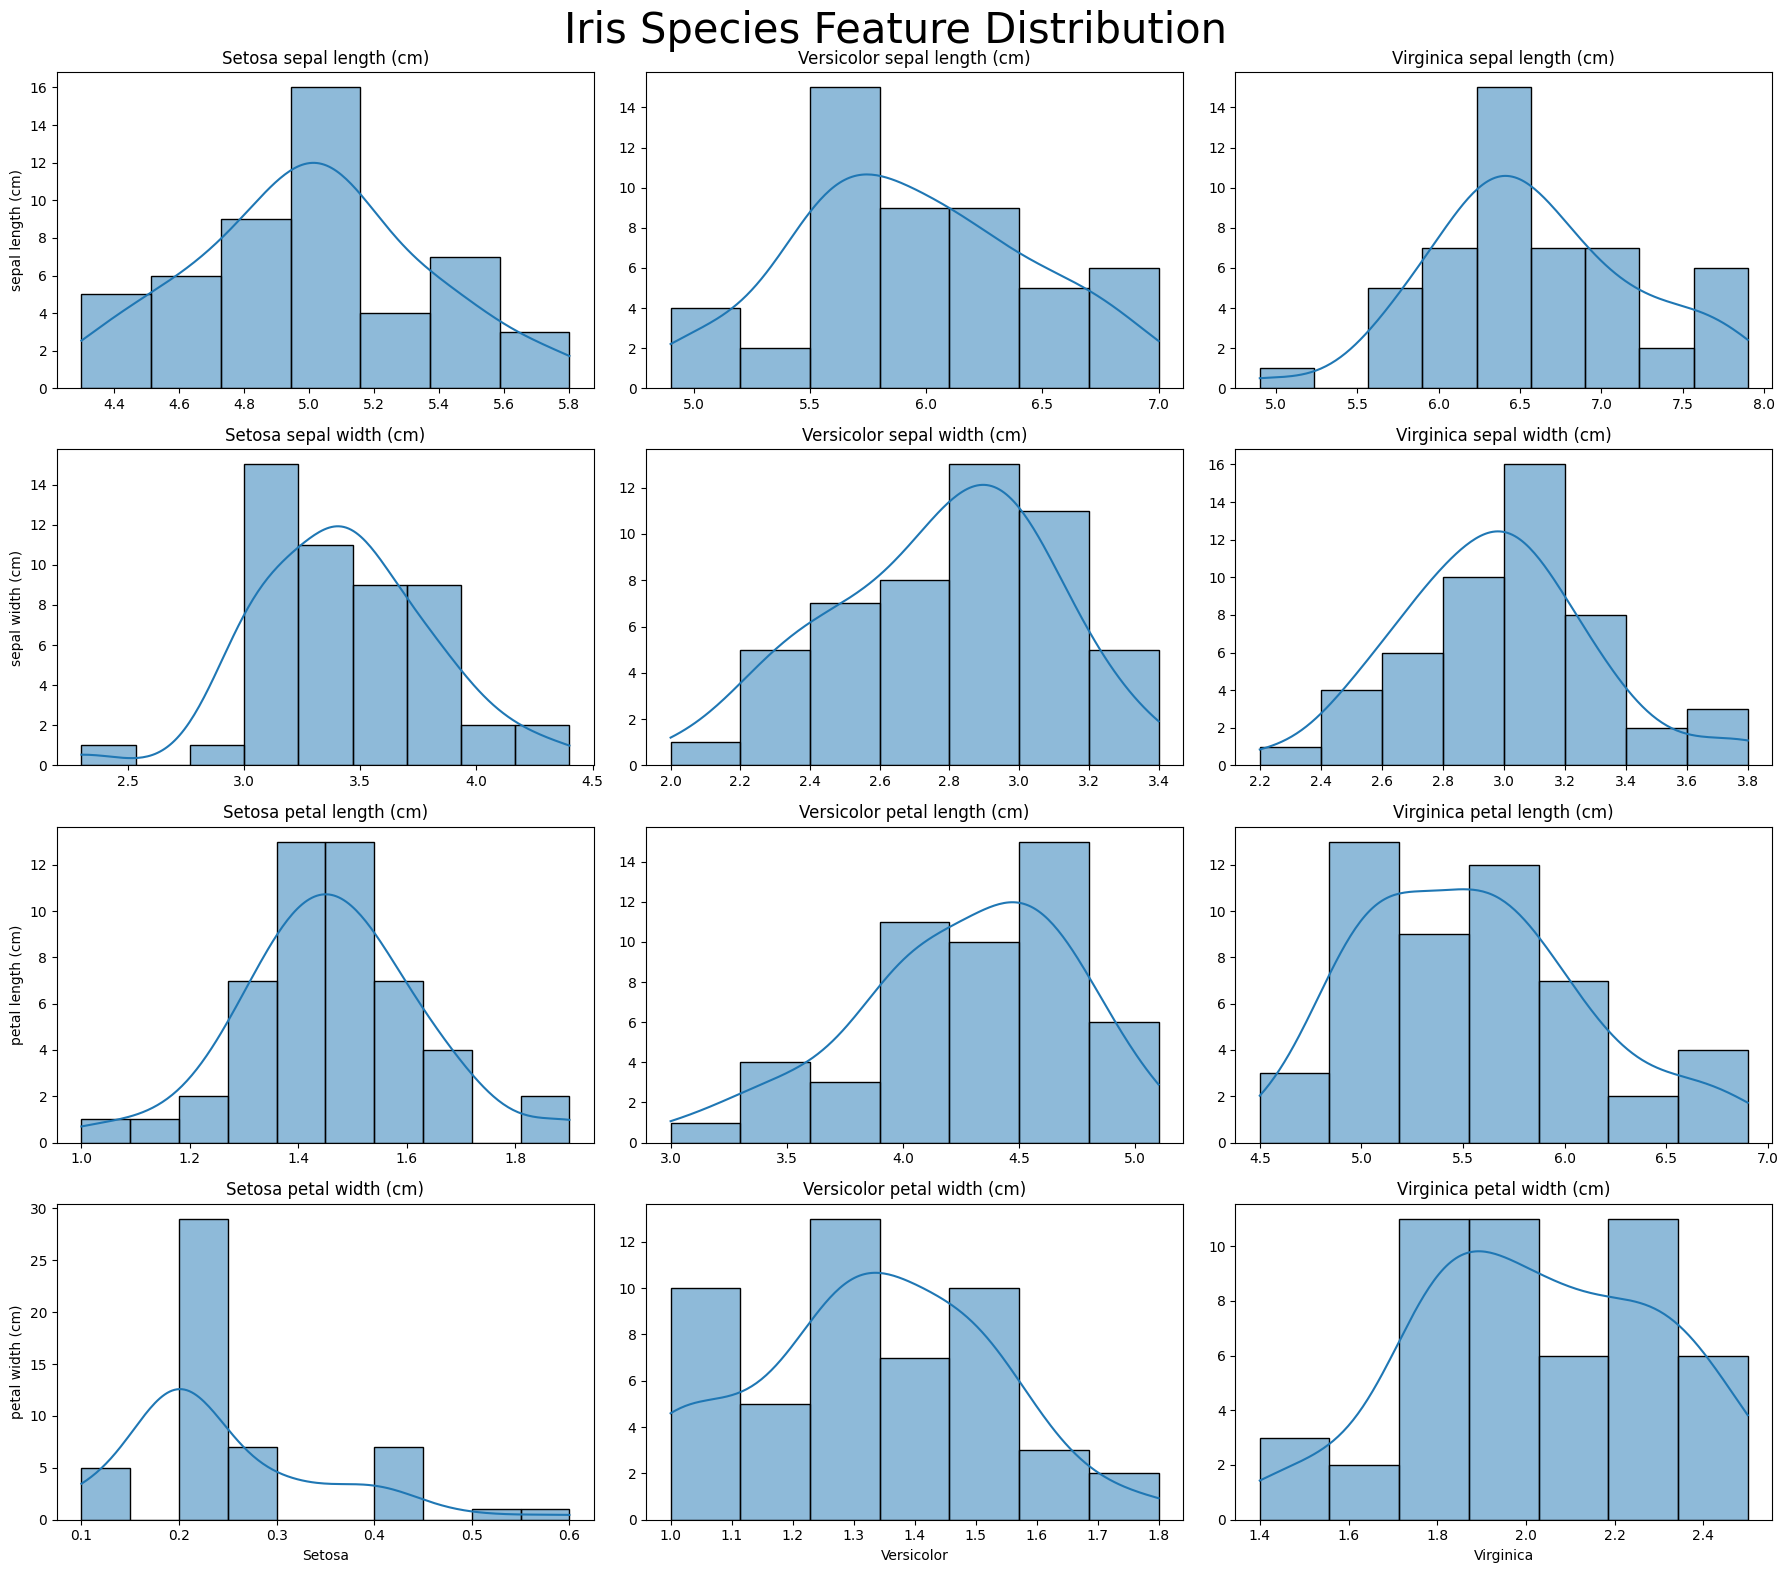

In [48]:
dfs = {'Setosa': setosa_df, 'Versicolor': versicolor_df, 'Virginica': virginica_df}
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# 그래프 그리기 설정
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))  # 전체 그래프 크기 설정
fig.suptitle('Iris Species Feature Distribution', fontsize=30)  # 전체 제목 설정

# 각 특성에 대해 그래프 그리기
for i, feature in enumerate(features):
    for j, (species, df) in enumerate(dfs.items()):
        ax = axes[i, j]
        sns.histplot(df[feature], kde=True, ax=ax)
        ax.set_title(f'{species} {feature}')
        ax.set_xlabel('')  # x축 라벨 제거
        ax.set_ylabel('')  # y축 라벨 제거

# 각 축의 라벨을 조정
for ax, feature in zip(axes[:,0], features):
    ax.set_ylabel(feature)

# x축 라벨 추가
for ax, species in zip(axes[-1], dfs.keys()):
   ax.set_xlabel(species)

plt.tight_layout()  # 레이아웃 조정
plt.show()

In [71]:
# 분포 그래프가 정확한지 파악
setosa_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


#### 그래프 분석
- 각 종의 특성 분포도가 정규분포(가우시안 분포)와 유사하다.
- **꽃받침 길이와 너비** : 각 종별로 다양하게 분포 / 특히 virginica 종이 가장 넓은 범위를 보여준다. 다른 두 종보다 더 큰 꽃받침을 가지고 있을 가능성이 높다.
- **꽃잎 길이와 너비** : Setosa는 꽃잎 길이와 너비가 상대적으로 작은 값을 가지며 분포가 좁게 몰려있다. 이는 다른 종에 비해 일정한 크기를 유지한다고 볼 수 있다.

## 3. Scikit learn의 Gaussian Naive Bayes Model 사용방법 숙지하기
- 해당 코드의 모델을 사용할 것 & 사용 방법 알아보기 (`from sklearn.naive_bayes import GaussianNB`)
- 사용 방법
    1. `from sklearn.naive_bayes import GaussianNB` 를 사용하여 가우시안 나이브 베이즈 모델을 불러온다.
    2. `GaussianNB()` 를 사용하여 모델을 생성한다.
    3. `fit()` 메소드를 사용하여 모델을 학습시킨다.
    4. `predict()` 메소드를 사용하여 예측을 수행한다.

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# sklearn의 train_test_split : 데이터 분할
from sklearn.model_selection import train_test_split

In [57]:
# 20%를 테스트 데이터로 분류
X_train,X_test,y_train,y_test=train_test_split(iris.data, iris.target ,test_size=0.2)

In [63]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train) 

pred = gnb_model.predict(X_test)

- 정확도 (Accuracy)
    - 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표
    - $Accuracy = \frac{예측 결과가 동일한 데이터 건수}{전체 예측 데이터 건수}$
    - 직관적으로 모델 예측 성능을 나타내는 평가 지표

In [64]:
print(accuracy_score(y_test, pred))

0.9333333333333333


In [79]:
# 특정 변수의 결과 뽑기 (확률의 결과가 아니라, 예측한 범주를 직접 출력하는 결과물)
gnb_model.predict(iris.data)[[1,10,60,140]] 

array([0, 0, 1, 2])

In [80]:
# label 2 : virginica에 prior를 높게 줘서, 가중치를 주는 경우
gnb_model2 = GaussianNB(priors= [1/100, 1/100, 98/100])
gnb_model2.fit(X_train, y_train)
pred2 = gnb_model2.predict(X_test)

## 4. sklearn의 confusion_matrix가 무엇인지 조사하고 모델 평가하기

- 사이킷런의 confusion_matrix 불러오기 (`from sklearn.metrics import confusion_matrix`)
- confusion_matrix : 분류 문제에서 모델을 학습시킨 뒤, 모델에서 데이터 X값을 집어넣어 나온 예측값과 실제 데이터 Y값을 비교하여 정확히 분류 되었는지 확인하는 메트릭(metric)이다.
    - True Negative, False Positive, False Negative, True Positive 값을 가지는 행렬
        - TP : 예측값을 Positive로 예측했을 때 실제 값도 Positive인 경우
        - TN : 예측값을 Negative로 예측했을 때 실제 값도 Negative인 경우
        - FP : 예측값을 Negative로 예측했을 때 실제 값은 Positive인 경우
        - FN : 예측값을 Positive로 예측했을 때 실제 값은 Negative인 경우

    - 정확도, 정밀도, 재현율, F1 스코어 등을 계산할 수 있다.
        - 정확도 : $\frac{TP + TN}{TP + TN + FP + FN}$
        - 정밀도 : $\frac{TP}{TP + FP}$
        - 재현율 : $\frac{TP}{TP + FN}$
        - F1 스코어 : $2 \times \frac{정밀도 \times 재현율}{정밀도 + 재현율}$

In [66]:
from sklearn.metrics import confusion_matrix

In [72]:
confusion_matrix(y_test, pred)

array([[13,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  6]])

- 행 : 실제 클래스, 열 : 예측 클래스
- 결과 분석
    1. 13개의 setosa 샘플 모두 정확하게 setosa로 예측되었다.
    2. Versicolor는 10개 중 9개가 정확하게 예측, 1개는 잘못하여 virginica로 예측
    3. Virginica는 7개 중 6개가 Virginica로 정확하게 예측, 1개는 잘못하여 versicolor로 예측

In [81]:
confusion_matrix(y_test, pred2)

array([[13,  0,  0],
       [ 0,  6,  4],
       [ 0,  0,  7]])

- pred2 : 2범주에 prior를 높게 줘서, 가중치를 주는 경우의 confusion_matrix
    - 해당 오차행렬을 보면 prior을 설정 안해주었을때보다 가중치를 높게준 label 2 의 정확도가 올랐다.

## 5. sklearn의 classification_report가 무엇인지 조사하고 모델 평가하기

- `from sklearn.metrics import classification_report` 를 사용하여 classification_report를 불러온다.
- classification_report는 scikit-learn의 metrics모듈에서 제공하는 분류 모델의 평가 지표를 출력해주는 함수
    - 정밀도 : 예측한 클래스 중 실제로 해당 클래스인 데이터의 비율
    - 재현율 : 실제 클래스 중 예측한 클래스와 일치한 데이터의 비율
    - F1 스코어 : 정밀도와 재현율의 조화평균
    - support : 각 클래스의 실제 데이터 수

In [73]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      0.90      0.90        10
           2       0.86      0.86      0.86         7

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



- 결과 분석
    - class 1 setosa : 정밀도, 재현율, f1-score 모두 1.0으로 완벽하게 분류했다는 의미 
        - (클래스의 구분이 다른 두 클래스와 명확하다는 것을 의미)
    - class 2 versicolor : 정밀도 0.9, 재현율 0.9, f1-score 0.9로 상대적으로 잘 분류 되었으나, 소수의 샘플이 잘못 분류된 경우가 있다.
    - class 3 virginica : 정밀도 0.86, 재현율 0.86, f1-score 0.86으로 virginica의 분류성능은 versicolor보다 약간 낮으며, 이는 virginica와 versicolor간의 경계가 상대적으로 더 모호하거나 겹치는 특성이 있을 수 있음을 시사한다.

    - 매크로 평균 : 모든 클래스에 동일한 가중치를 주어 계산된 평균 정밀도, 재현율 ,F1 스코어는 모두 0.92로 균형 잡힌 성능을 보이고 있다.
    - 가중 평균 : 샘플 수를 고려한 가중 평균도 0.93이다. 이는 특히 샘플 수가 많은 클래스의 영향을 더 받아 계산되므로, 모델의 성능이 실제 테스트 데이터의 분포를 잘 반영하고 있다.

In [82]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.60      0.75        10
           2       0.64      1.00      0.78         7

    accuracy                           0.87        30
   macro avg       0.88      0.87      0.84        30
weighted avg       0.92      0.87      0.86        30



- pred2 : 2범주에 prior를 높게 줘서, 가중치를 주는 경우
    - label 2의 재현율은 올랐고, 정밀도는 낮아진 것을 볼수있다. (recall 과 precision의 trade-off 관계)
    - label2에 집중을 하였기 때문에 전체적인 모델의 정확도는 낮아진 것을 확인할 수 있다.

## 결론 및 느낀점

이번 과제에 대한 분석은 Gaussian Naive Bayes 모델이 iris데이터셋에 대해 전반적으로 우수한 성능을 보이고 있으나, Virginica와 versicolor구분에서 약간의 개선이 필요할 수 있다.  
또한, confusion_matrix와 classification_report를 통해 모델의 성능을 평가하고, 각 클래스에 대한 성능을 확인할 수 있었다.

- 과제 수행 시 알게된 점
    - 데이터 분석을 체계적으로 진행하면서 데이터에 대한 이해도를 높일 수 있었다.
    - Gaussian Naive Bayes 모델을 사용하여 분류 문제를 해결할 수 있었다.
    - prior를 설정하여 가중치를 주는 방법을 알게 되었고 해당 과정을 통해 모델의 성능을 개선시키기 위한 시행착오를 경험할 수 있었다.